In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

In [3]:
data

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [8]:
## let's see the description
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information: (All the features)

- MedInc     :   median income in block group
- HouseAge   :   median house age in block group
- AveRooms   :   average number of rooms per household
- AveBedrms  :   average number of bedrooms per household
- Population :   block group population
- AveOccup   :   average number of household members
- Latitude   :   block group latitude
- Longitude  :   block group longitude

In [12]:
## all the keys available in the dictionary
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [ ]:
## main data = data.data
## target stores the target values
## features names are the predictors

data.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [11]:
data.target_names

['MedHouseVal']

- Problem : **We have to predict the median house value based on the features**
    - There are 8 features so we will apply a MLR.

## DataFrame

In [13]:
df = pd.DataFrame(data = data.data, columns = data.feature_names)
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [14]:
## let's add the target variable in the dataset
df['Target'] = data.target
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [15]:
### Let's go through the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


- Everything is in float. Non-null. So data cleaning not needed

In [16]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [17]:
### Statistical Summary
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


### Correlation Matrix

In [18]:
df.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
Target,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


<Figure size 900x500 with 0 Axes>

<Figure size 900x500 with 0 Axes>

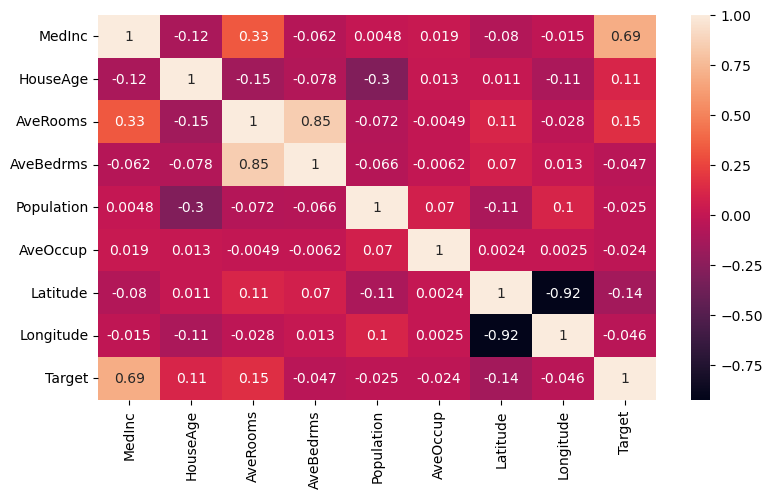

In [32]:
# visualization through a heatmap
plt.figure(figsize = (9 , 5))
sns.heatmap(data = df.corr(), annot = True)
plt.show()

### We can notice that the target variable (Median House value) is highly correlated (0.69) with the Median income

In [35]:
df.head(9)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267


In [45]:
## declaring X and y
## here X will be a vector
X = df.iloc[: , :-1] #row (all), column(exclude the last)
X.shape

(20640, 8)

In [ ]:
y = df.iloc[ : ,-1]  #only the last column. All rows #target(not using -1: to avoid creating df of y)

In [51]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: Target, Length: 20640, dtype: float64

In [52]:
y.shape

(20640,)

### Train test split

In [53]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 95)

In [54]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13828, 8), (6812, 8), (13828,), (6812,))

In [55]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12341,5.7613,28.0,8.647399,1.624277,676.0,1.953757,33.84,-116.55
12782,1.1250,18.0,5.487500,1.381250,837.0,2.615625,38.64,-121.44
194,3.6250,52.0,3.973568,1.044053,846.0,3.726872,37.79,-122.25
18121,6.6766,26.0,5.894068,1.021186,700.0,2.966102,37.31,-122.01
15836,4.2667,46.0,5.256055,1.006920,573.0,1.982699,37.75,-122.44
...,...,...,...,...,...,...,...,...
4449,2.3859,31.0,3.735219,1.038560,1486.0,3.820051,34.07,-118.21
6487,3.4005,34.0,5.099773,1.043084,1544.0,3.501134,34.10,-118.00
7588,2.4706,28.0,3.833910,0.982699,1498.0,5.183391,33.90,-118.23
1794,3.2875,52.0,4.052632,0.868421,89.0,2.342105,37.94,-122.41


### scaling

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
X_train_scaled

array([[ 0.99505941, -0.04930741,  1.19128353, ..., -0.09873846,
        -0.84019418,  1.50947784],
       [-1.43833817, -0.84267825,  0.01609797, ..., -0.04174286,
         1.40694939, -0.93219352],
       [-0.12619402,  1.85478259, -0.54694243, ...,  0.05395028,
         1.00901772, -1.33664215],
       ...,
       [-0.7320897 , -0.04930741, -0.59888218, ...,  0.17937587,
        -0.81210488,  0.67062142],
       [-0.30333348,  1.85478259, -0.51753831, ..., -0.06529654,
         1.07924095, -1.41653324],
       [-0.22318771,  0.90273759, -0.3125485 , ...,  0.09884438,
        -0.79806024,  0.685601  ]])

# Model Training

In [63]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [64]:
model

LinearRegression()

In [65]:
model.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
## Intercept
model.intercept_

2.0661990360138938

In [ ]:
## Coefficients of 8 Predictors
model.coef_

array([ 0.81448393,  0.12094993, -0.2520899 ,  0.30438056, -0.0042147 ,
       -0.04218138, -0.89667251, -0.86433852])

## Model
$\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \dots + \beta_n X_n$

$\hat{y} = 2.01 + (0.814 \cdot X_1) + (0.1209 \cdot X_2) + (-0.252 \cdot X_3) + (0.304 \cdot X_4) + (-0.0042 \cdot X_5) + (-0.042 \cdot X_6) + (-0.896 \cdot X_7) + (-0.864 \cdot X_8)$

- Seeing this model we can assume that the $X_5$ and $X_6$ might not have much impact the y values

## Prediction

In [69]:
# test data
y_pred_test = model.predict(X_test_scaled)
y_pred_test

array([0.59448722, 2.59118002, 7.05815298, ..., 0.46377257, 1.30460893,
       1.81200134])

In [70]:
## on Train data
y_pred_train = model.predict(X_train_scaled)


## Performance Metrics - MSE-RMSE, MAE, $R^2$, $R^2_{Adjusted }$

In [81]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

mse_train = mean_squared_error(y_true = y_train, y_pred = y_pred_train)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_true=y_train, y_pred=y_pred_train)
r2_train = r2_score(y_true=y_train, y_pred=y_pred_train)

mse_test = mean_squared_error(y_true = y_test, y_pred = y_pred_test)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_true=y_test, y_pred=y_pred_test)
r2_test= r2_score(y_true=y_test, y_pred=y_pred_test)

n = len(y_test) #total obs
p = X.shape[1]  #predictors
adjusted_r2_test = 1 - ((1 - r2_test)*(n - 1)/( n - p - 1))

In [83]:
print(f"For train data: \n MSE = {mse_train:.3f} \t RMSE = {rmse_train:.3f} \t MAE = {mae_train:.3f} \n R2 = {round(r2_train*100 , 2)}%")

print(f"\n\nFor TEST DATA: \n MSE = {mse_test:.3f} \t RMSE = {rmse_test:.3f} \t MAE = {mae_test:.3f} \n R2 = {round(r2_test*100 , 2)}% \t Adjusted R2 = {round(adjusted_r2_test*100 , 2)}%")

For train data: 
 MSE = 0.526 	 RMSE = 0.725 	 MAE = 0.532 
 R2 = 60.31%


For TEST DATA: 
 MSE = 0.522 	 RMSE = 0.723 	 MAE = 0.531 
 R2 = 61.21% 	 Adjusted R2 = 61.16%


### Comments :
- For train data we get a $R^2 = 60.31$%. Which indicates that the model doesn't suffer from over-fitting.
- And for test data (Unseen data for the model) the Adjusted $R^2_{Adjusted} = 61.16$%. Which means approximately $61$% of the variation in the House Price values can be explained by the features.

8

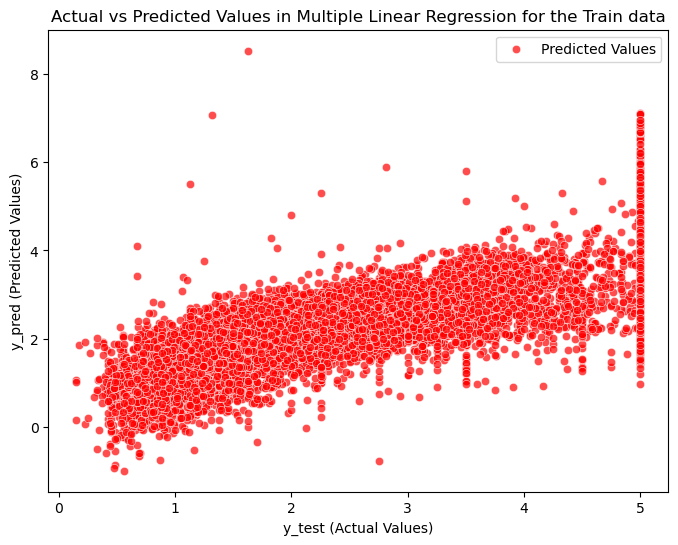

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_pred_train, color="red", label="Predicted Values", alpha=0.7)

# Labels and title
plt.title("Actual vs Predicted Values in Multiple Linear Regression for the Train data")
plt.show()

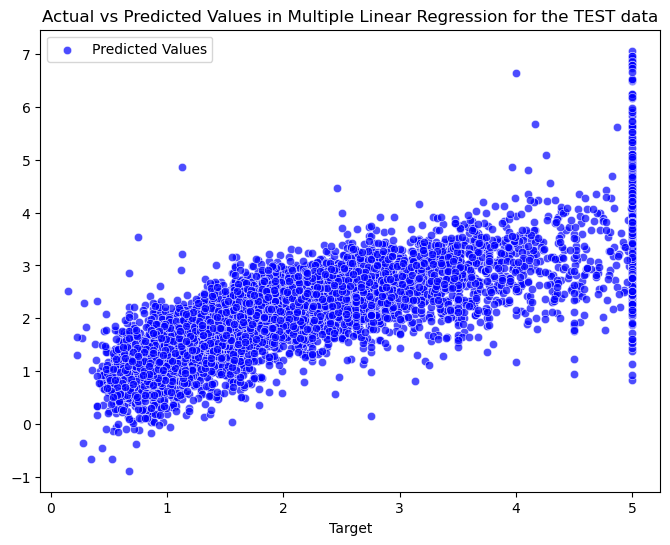

In [75]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_test, color="blue", label="Predicted Values", alpha=0.7)

# Labels and title
plt.title("Actual vs Predicted Values in Multiple Linear Regression for the TEST data")
plt.show()

### Assumption Verification
 - Normality of Error
 - Homoscedasticity

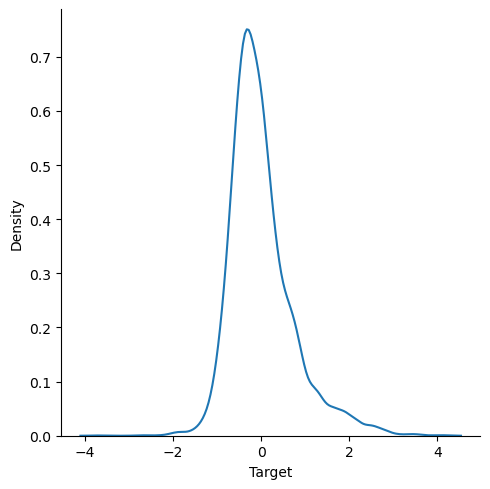

In [91]:
error = y_test - y_pred_test

sns.displot(error, kind='kde')
plt.show()

### Approximately a normal Distribution

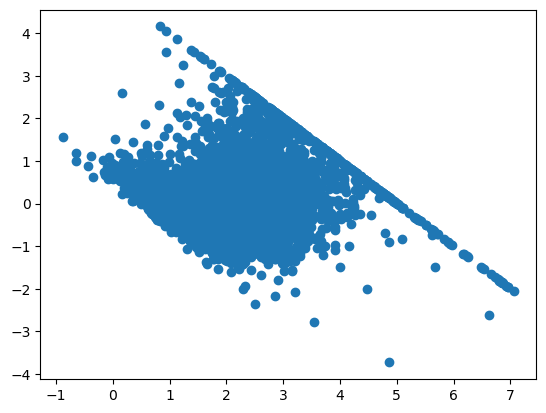

In [92]:
### Homoscedasticity - Constant variance. Residual plot doesn't show any pattern

plt.scatter(y_pred_test, error)
plt.show()


## Pickling the Model:
- Pickle module of Python helps us to store our model or any python object so that our model can be stored, shared and used by others or in other machine or script. It uses the mechanism of **Serialization** and **Deserialization** to convert the model to byte format which can be read by the machine and then restore the model by Deserialization.

In [93]:
import pickle

In [94]:
## first we need to dump the model into a .pkl format with 
pickle.dump(scaler, open('Std_scaler.pkl', 'wb'))  #the standard scaler object which we used, wb = Write Binary
pickle.dump(model, open("MLR_Model.pkl", 'wb'))    # our trained model

In [97]:
### We have now be able to see the model files

## we can load the model in other files as 
trained_model = pickle.load(open("MLR_Model.pkl", 'rb'))
# trained_model.predict(X_test_scaled)
trained_model.intercept_

2.0661990360138938